## 1. Data Acquisition

- **Source:** Kaggle
- **Dataset:** Crypto Historical Data (365 Days)
- **Acquisition Date:** December 15, 2025
- **Format:** CSV
- **Description:** Daily historical cryptocurrency market data including prices, volume, market capitalization, and derived metrics.
- **Data Handling:** The original dataset was preserved as raw data. All transformations and derived fields were applied on a separate processed copy to maintain reproducibility.

## 2. Load Data

In [1]:
import pandas as pd

df = pd.read_csv("crypto_historical_365days.csv")
df.head()

,coin_id,coin_name,symbol,market_cap_rank,timestamp,date,price,market_cap,volume,daily_return,price_ma7,price_ma30,volatility_7d,cumulative_return,month
0,aave,Aave,AAVE,46,2024-12-04 00:00:00,2024-12-04,241.886714,3.633154e+09,1.181708e+09,NaN,241.886714,241.886714,NaN,NaN,2024-12
1,aave,Aave,AAVE,46,2024-12-05 00:00:00,2024-12-05,255.966610,3.841768e+09,1.191179e+09,5.820864,248.926662,248.926662,NaN,5.820864,2024-12
2,aave,Aave,AAVE,46,2024-12-06 00:00:00,2024-12-06,248.589404,3.725870e+09,8.706666e+08,-2.882097,248.814243,248.814243,6.153922,2.771004,2024-12
3,aave,Aave,AAVE,46,2024-12-07 00:00:00,2024-12-07,281.755167,4.226339e+09,1.120551e+09,13.341583,257.049474,257.049474,8.119016,16.482283,2024-12
4,aave,Aave,AAVE,46,2024-12-08 00:00:00,2024-12-08,282.398618,4.241226e+09,6.553344e+08,0.228372,262.119303,262.119303,7.120498,16.748297,2024-12


## 3. Data Dictionary

The Kaggle dataset did not include a formal data dictionary. The following was created through inspection and exploratory analysis.

In [5]:
# Build a data dictionary
data_dict = pd.DataFrame({
    "Column": df.columns,
    "Data Type": df.dtypes.astype(str),
    "Non-Null Count": df.notna().sum().values,
    "Unique Values": df.nunique().values,
    "Sample Values": [df[col].dropna().unique()[:5] for col in df.columns]
})

# Display the data dictionary
data_dict

,Column,Data Type,Non-Null Count,Unique Values,Sample Values
coin_id,coin_id,object,33364,100,"[aave, algorand, aptos, arbitrum, aster-2]"
coin_name,coin_name,object,33364,100,"[Aave, Algorand, Aptos, Arbitrum, Aster]"
symbol,symbol,object,33364,97,"[AAVE, ALGO, APT, ARB, ASTER]"
market_cap_rank,market_cap_rank,int64,33364,100,"[46, 86, 73, 87, 59]"
timestamp,timestamp,object,33364,465,"[2024-12-04 00:00:00, 2024-12-05 00:00:00, 202..."
date,date,object,33364,365,"[2024-12-04, 2024-12-05, 2024-12-06, 2024-12-0..."
price,price,float64,33364,32974,"[241.886714069212, 255.9666099556995, 248.5894..."
market_cap,market_cap,float64,33364,31527,"[3633153845.145704, 3841768449.872117, 3725869..."
volume,volume,float64,33364,32994,"[1181708218.5850096, 1191179116.5987434, 87066..."
daily_return,daily_return,float64,33264,32887,"[5.820863680201471, -2.8820968759360355, 13.34..."


## 4. Rolling metrics such as daily return, cumilative return, and volatility contain missing values at the beginning of each time series. These gaps are expected and result from rolling-window calculations rather than data loss.

In [6]:
df.isna().sum()

coin_id                0
coin_name              0
symbol                 0
market_cap_rank        0
timestamp              0
date                   0
price                  0
market_cap             0
volume                 0
daily_return         100
price_ma7              0
price_ma30             0
volatility_7d        200
cumulative_return    100
month                  0
dtype: int64

## Task 5: Inconsistencies & validity checks

In [8]:
(df['price'] <= 0).sum(), (df['volume'] < 0).sum()

(np.int64(0), np.int64(0))

In [9]:
df['symbol'].nunique(), df['coin_id'].nunique()

(97, 100)

# No invalid price or volume values were observed. Each cryptocurrency maintained consistent identifiers and symbols across the dataset.

## Task 06: Temporal Coverage

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.groupby('coin_name')['date'].nunique().describe()

count    100.000000
mean     332.640000
std       80.668735
min       24.000000
25%      365.000000
50%      365.000000
75%      365.000000
max      365.000000
Name: date, dtype: float64

## Most cryptocurrencies contain near-complete daily coverage across the 365-day period, with minor gaps likely due to listing dates or market inactivity.

## 7. The dataset does not include geographic attributes. Cryptocurrency markets are global by nature, and all observations reflect aggregate global trading activity.

## 8. Data Limitations and Biases

This dataset cannot explain investor demographics, geographic participation, regulatory impacts, or intraday price dynamics. It reflects only daily aggregate market behavior.

Because the data was sourced from Kaggle, preprocessing decisions made by the dataset author may introduce bias or obscure raw market signals. Additionally, survivorship bias may exist as only actively traded cryptocurrencies are included.

These limitations constrain conclusions to descriptive market behavior rather than causal inference or adoption analysis.

## Task 9: Summary statistics (pure Pandas)

In [15]:
df[['price', 'volume', 'daily_return', 'volatility_7d']].describe()

,price,volume,daily_return,volatility_7d
count,33364.000000,3.336400e+04,33264.000000,33164.000000
mean,4935.370689,2.267570e+09,0.006311,3.341479
std,21026.134092,1.165108e+10,4.968284,3.769143
min,0.000002,0.000000e+00,-76.575558,0.000000
25%,0.999408,2.355836e+07,-1.614341,1.157136
50%,3.373112,1.239228e+08,0.000000,2.928408
75%,190.019842,4.350004e+08,1.317147,4.582064
max,125397.347055,2.794751e+11,346.177143,139.182855


In [16]:
df.groupby('coin_name')['daily_return'].mean().sort_values(ascending=False)

coin_name
Figure Heloc      3.182894
MemeCore          2.999371
Rain              2.044466
Aster             1.068536
Zcash             0.697627
                    ...   
Toncoin          -0.313795
VeChain          -0.360379
POL (ex-MATIC)   -0.367344
Aptos            -0.424666
Canton           -1.464564
Name: daily_return, Length: 100, dtype: float64

## 10. Visualizations

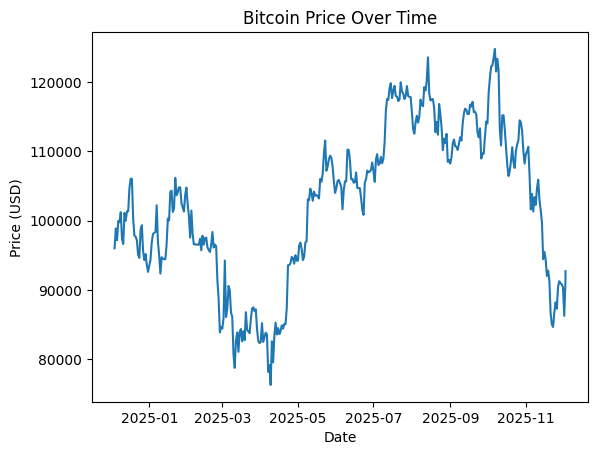

In [17]:
import matplotlib.pyplot as plt

btc = df[df['coin_name'] == 'Bitcoin']
plt.figure()
plt.plot(btc['date'], btc['price'])
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

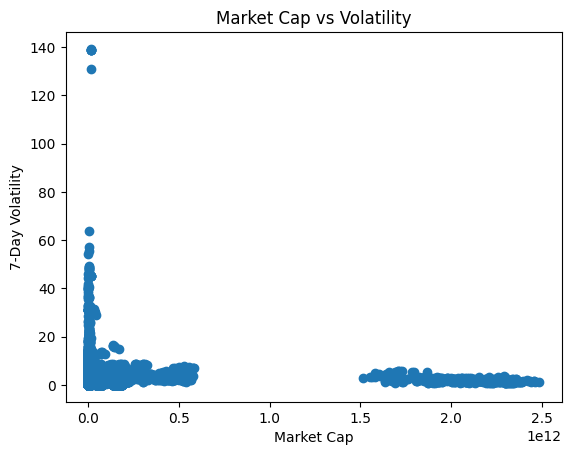

In [19]:
plt.figure()
plt.scatter(df['market_cap'], df['volatility_7d'])
plt.xlabel("Market Cap")
plt.ylabel("7-Day Volatility")
plt.title("Market Cap vs Volatility")
plt.show()

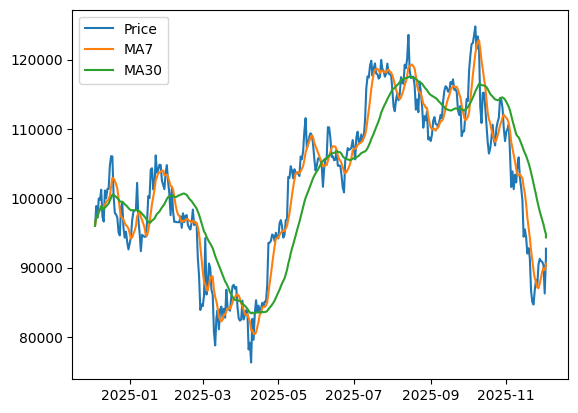

In [20]:
plt.figure()
plt.plot(btc['date'], btc['price'], label='Price')
plt.plot(btc['date'], btc['price_ma7'], label='MA7')
plt.plot(btc['date'], btc['price_ma30'], label='MA30')
plt.legend()
plt.show()

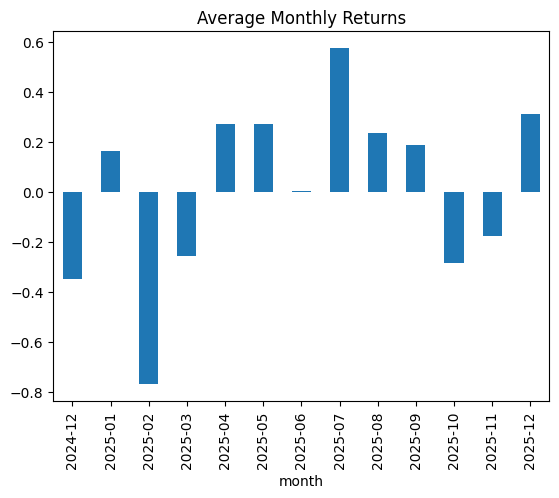

In [23]:
df.groupby('month')['daily_return'].mean().plot(kind='bar')
plt.title("Average Monthly Returns")
plt.show()

## 11. LLM Based Analysis

In [24]:
df[['daily_return', 'volatility_7d']].corr()

,daily_return,volatility_7d
daily_return,1.000000,0.145742
volatility_7d,0.145742,1.000000


In [ ]:
## 